# Example: Sensitivity of Standard Deviation to Sampling

As you may have already realized, the sample mean and variance/standard deviation of our data often depend on the sample size of the data and how random the values in our sample are. Another important thing to note is that the estimate of the standard deviation depends greatly on the sampling rate (e.g. for time series the standard deviation likely depends on whether or not you are using daily data, monthly data, yearly data, etc.).

Here is an example demonstrating the sensitivity of surface air temperature (SAT) standard deviation to sampling rate. The data are from the [UTSC weather station](https://weather.utsc.utoronto.ca/data/). You can download the file [here](https://github.com/kls2177/Climate-and-Geophysical-Data-Analysis/blob/master/chapters/Week1b/UTSC_TC_20152018.csv?raw=true) to use in your own notebook.

First, we import the packages we need.

In [1]:
# import packages
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
mpl.rc('font',size=16) #set default font size and weight for plots

Next, we load in the time series data that we will be working with.

In [2]:
# load data: UTSC air temperature data for the years 2015-2018. in deg C. Data are collected hourly.
filename = 'UTSC_TC_20152018.csv'
X = np.genfromtxt(filename, delimiter = ',')

Let's adhere to one of our "best practices" when working with data - let's take a look at it.

Text(0.5, 1.0, 'Hourly SAT, UTSC (2015-2018)')

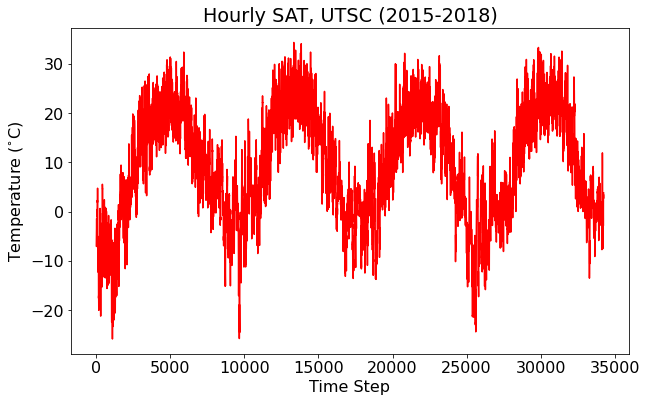

In [3]:
# define size of plot
plt.figure(figsize=(10,6))

# plot data using a simple plt.plot() command
plt.plot(X,'r')

# add labels
plt.ylabel("Temperature ($^{\circ}$C)")
plt.xlabel("Time Step")
plt.title("Hourly SAT, UTSC (2015-2018)")

```{tip} 
*Data analysis* in the sciences requires us to connect what we see in the data to physical processes. What are the key features of the data that you notice? What do you think is the largest source of variability? What do you think is the smallest source of variability? 
```

To make the data more readable, let's convert the x-axis to number of days rather than number of hours.

In [4]:
# create a time dimension in units of days

# use np.arange() to specify a range of values
xindex = (np.arange(0,np.size(X),1))/24.0 # divide by 24 hours per day

Now, let's compute the summary statistics we have looked at so far, the **sample mean and standard deviation**.

In [5]:
# average temperature and standard deviation of hourly temperature
avg = np.mean(X)
v = np.std(X)
print(avg, v)

9.381128306183221 10.981767100971688


I'm going to round these to the nearest hundredth.

In [6]:
print(np.round(avg,2), np.round(v,2))

9.38 10.98


We can now replot the data and add our summary statistics to the plot.

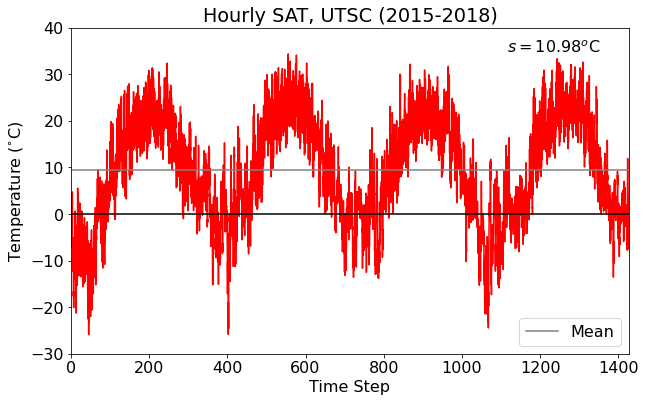

In [7]:
# define size of plot
plt.figure(figsize=(10,6))


# plot data using a simple plt.plot() command, but now using our x-axis variable, xindex
plt.plot(xindex,X,'r')
plt.axhline(0,color='k') # add zero line
plt.axhline(avg,color='gray', label="Mean") # horizontal line for the mean

# add standard deviation as text
plt.text(0.95, 0.925,'$s = $' + str(np.round(v,2)) + '$^o$C', ha='right', 
         transform=plt.gca().transAxes, color = 'k')

# set limits for y- and x-axes
plt.ylim(-30,40)
plt.xlim(0,xindex[-1]) 

# add labels
plt.ylabel("Temperature ($^{\circ}$C)")
plt.xlabel("Time Step")
plt.title("Hourly SAT, UTSC (2015-2018)")

# add legend
plt.legend(loc="lower right")

Now, let's imagine that instead of hourly data, we only sample the temperature once per month. How does this change the standard deviation?

In [8]:
# average temperature and standard deviation of once-per-month temperature

# indexing with double colons (::) only grabs one value per month (~720 hours)
avg_mnth = np.round(np.mean(X[::720]),2) # note how I've calculated the mean and rounded in the same line of code!
v_mnth = np.round(np.std(X[::720]),2) 
print(avg_mnth,v_mnth)

9.63 11.11


Notice how the mean and standard deviation have changed! Let's plot the data to see how what this looks like.

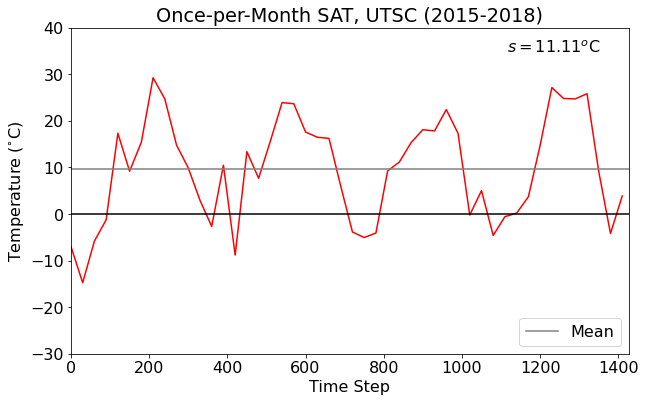

In [9]:
# define size of plot
fig = plt.figure(figsize=(10,6))

# plot only data sampled once-per-month
plt.plot(xindex[::720],X[::720], 'r') 
plt.axhline(0,color='k') # add zero line
plt.axhline(avg_mnth,color='gray', label="Mean") # horizontal line for the mean

# add standard deviation as text
plt.text(0.95, 0.925,'$s = $' + str(np.round(v_mnth,2)) + '$^o$C', ha='right', 
         transform=plt.gca().transAxes, color = 'k')

# set limits for y- and x-axes
plt.ylim(-30,40)
plt.xlim(0,xindex[-1]) 

# add labels
plt.ylabel("Temperature ($^{\circ}$C)")
plt.xlabel("Time Step")
plt.title("Once-per-Month SAT, UTSC (2015-2018)")

# add legend
plt.legend(loc="lower right")

Now, let's imagine that we only have one month of hourly data. Let's choose the last month of our record (December 2018). How does this change the standard deviation?

In [10]:
# average temperature and standard deviation of the last month of temperature

# indexing the last 720 hours
avg_dec = np.round(np.mean(X[-720:]),2) 
v_dec = np.round(np.std(X[-720:]),2) 
print(avg_dec,v_dec)

0.12 3.55


Again, let's plot this data to see what it looks like.

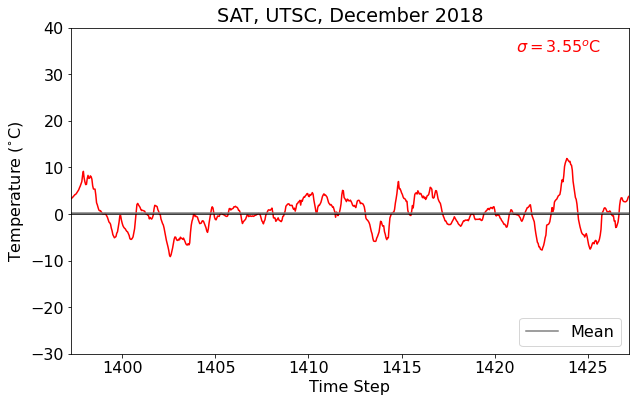

In [11]:
# define size of plot
fig = plt.figure(figsize=(10,6))

# plot only last month of data, December 2018
plt.plot(xindex[-720:],X[-720:], color = 'red')
plt.axhline(0,color='k') # add zero line
plt.axhline(avg_dec,color='gray', label="Mean") # horizontal line for the mean

# add standard deviation as text
plt.text(0.95, 0.925,'$\sigma = $' + str(np.round(v_dec,2)) + '$^o$C', ha='right', 
         transform=plt.gca().transAxes, color = 'red')

# set limits for y- and x-axes
plt.ylim(-30,40)
plt.xlim(xindex[-720],xindex[-1]) 

# add labels
plt.ylabel("Temperature ($^{\circ}$C)")
plt.xlabel("Time Step")
plt.title("SAT, UTSC, December 2018")

# add legend
plt.legend(loc="lower right")